# Monte Carlo

### Peter Onyisi
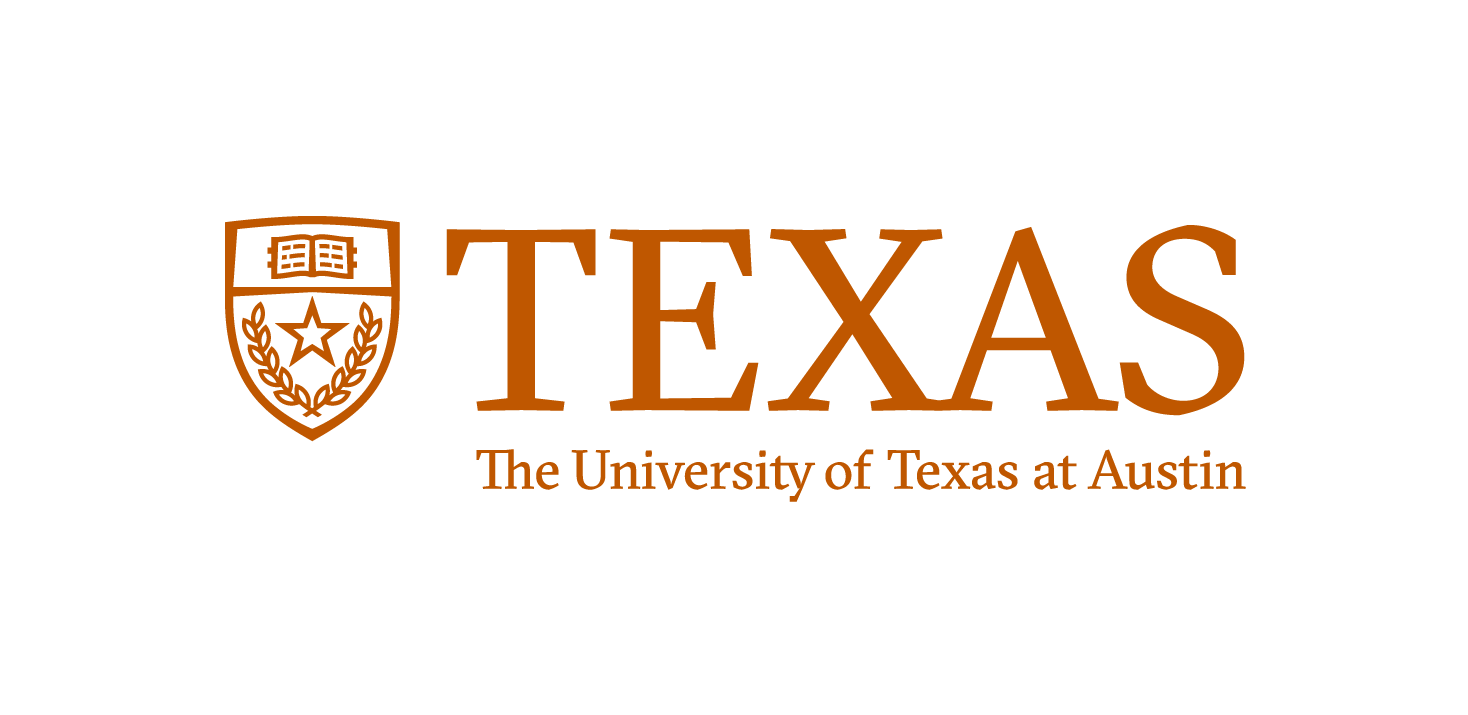

"Monte Carlo" (MC):
* named after the casino in Monaco
* refers to a general method for obtaining approximate answers to questions by using random numbers instead of exact analytic methods 
* can give answers where analytic solutions may be very difficult or impossible
* doesn't give exact answers and may require enormous computing resources

Our simulated coin flips are an example of Monte Carlo: we have been trying to evaluate things like "what are the statistical properties of a set of coin flips?" In this case there's an obvious statistical aspect to the problem. But let's apply MC techniques to a problem which is less obvious.

### Evaluate &pi;
We will show two ways to evaluate pi, using Monte Carlo (random sampling) techniques.

In [1]:
# import Python packages
import numpy
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8,6)
matplotlib.rcParams['font.size'] = 16
import math
import tqdm.notebook

Our first method: the area of a circle with radius 1 is $\pi$, and the area of a square of edge 2 is 4 (and the square completely covers the circle). Choose a random point in a square of edge 2; then it will be inside a circle of radius 1 with probability $\pi/4$.

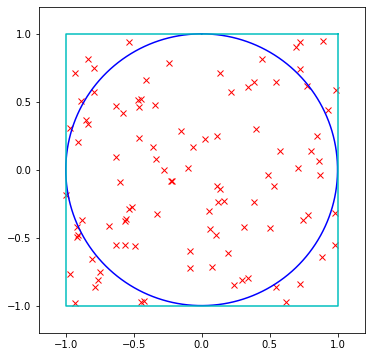

In [2]:
# Python allows us to use "_" inside a number as a way to separate it into blocks, has no meaning otherwise
N_attempts = 2_000_000
results = numpy.zeros(N_attempts)

# x and y positions are independent random numbers. Generate N_attempts numbers from -1 to 1 for both
x_values = numpy.random.uniform(-1, 1, N_attempts)
y_values = numpy.random.uniform(-1, 1, N_attempts)

print("done generating random numbers")

# there are magic numpy ways to make this faster! see later
for attempt in range(N_attempts):
    # is x**2 + y**2 <= 1 ?
    if x_values[attempt]**2 + y_values[attempt]**2 <= 1:
        results[attempt] = 1
        # otherwise leave it as zero
        
# so now "results" has 1 every time the random point was in the circle, and 0 when it wasn't, so the fraction inside the
# circle is the sum of the array elements divided by the number of elements - i.e., the mean value of the array
print(f"Fraction passing: {results.mean()}")
print(f"Our estimate of pi: {results.mean()*4}")
print(f"The true value of pi: {math.pi}")

done generating random numbers
Fraction passing: 0.785434
Our estimate of pi: 3.141736
The true value of pi: 3.141592653589793


In [3]:
# Faster way to check if the points are inside the circle
# General rule is to avoid "for" loops if a simple numpy expression can be written
results_2 = numpy.zeros(N_attempts)
# the following means: "for the indices where the point satisifies x**2 + y**2 <= 1, set results_2 to 1"
results_2[x_values**2 + y_values**2 <= 1] = 1
print(f"Fraction passing: {results_2.mean()}")
print(f"Our estimate of pi: {results_2.mean()*4}")
print(f"The true value of pi: {math.pi}")

Fraction passing: 0.785434
Our estimate of pi: 3.141736
The true value of pi: 3.141592653589793


In [4]:
# Even faster - skip filling the results_2 array, since we don't actually care *which* points are inside the
# circle, just how many there are
# when the expression is True, sum counts it as 1, and when the expression is False, sum counts it as zero

count = numpy.sum(x_values**2 + y_values**2 <= 1)
print(f"Fraction passing: {count/N_attempts}")
print(f"Our estimate of pi: {count/N_attempts*4}")
print(f"The true value of pi: {math.pi}")

Fraction passing: 0.785434
Our estimate of pi: 3.141736
The true value of pi: 3.141592653589793


Our second method: the integral of the function $\int_0^1 \sqrt{1-x^2} dx$ is $\pi/4$ (it is the area of one quadrant of a circle). Do a Monte Carlo integration of the function by randomly choosing points along the $x$ axis in the range $[0,1]$ and adding the value of $\sqrt{1-x^2}$, multiplying by the width of the range we're chosing points over, and dividing by the number of random points we've chosen.

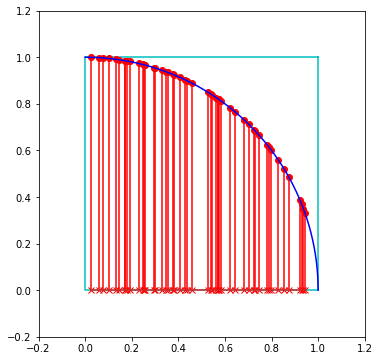

In [5]:
# The "slow" way ...

N_attempts = 2_000_000
x_values = numpy.random.uniform(0, 1, N_attempts)
results = numpy.zeros(N_attempts)

print("done generating random numbers")

for attempt in range(N_attempts):
    results[attempt] = math.sqrt(1-x_values[attempt]**2)
    
# our estimate of the integral (=pi/4) is the total value of results, times the range we're choosing random numbers over
# (1), divided by the number of attempts (= the mean result * 1)
print(f"Our estimate of pi: {results.mean()*4}")
print(f"The true value of pi: {math.pi}")

done generating random numbers
Our estimate of pi: 3.141262310766478
The true value of pi: 3.141592653589793


In [6]:
# the "fast" way, using numpy tricks
results_2 = numpy.sqrt(1-x_values**2) # evaluate all together
print(f"Our estimate of pi: {results_2.mean()*4}")
print(f"The true value of pi: {math.pi}")

Our estimate of pi: 3.141262310766478
The true value of pi: 3.141592653589793


How wrong are our estimates? Let's repeat the procedure a number of times, with different random numbers, and see what the distribution of answers looks like. (Let's do it the "fast" way, we don't have all day.)

First method (points in circle):

In [7]:
N_tries = 500
N_attempts = 2_000_000
estimates = numpy.zeros(N_tries)
for this_try in tqdm.notebook.tqdm(range(N_tries)):
    x_values = numpy.random.uniform(-1, 1, N_attempts)
    y_values = numpy.random.uniform(-1, 1, N_attempts)
    estimates[this_try] = numpy.sum(x_values**2 + y_values**2 <= 1)/N_attempts*4

  0%|          | 0/500 [00:00<?, ?it/s]

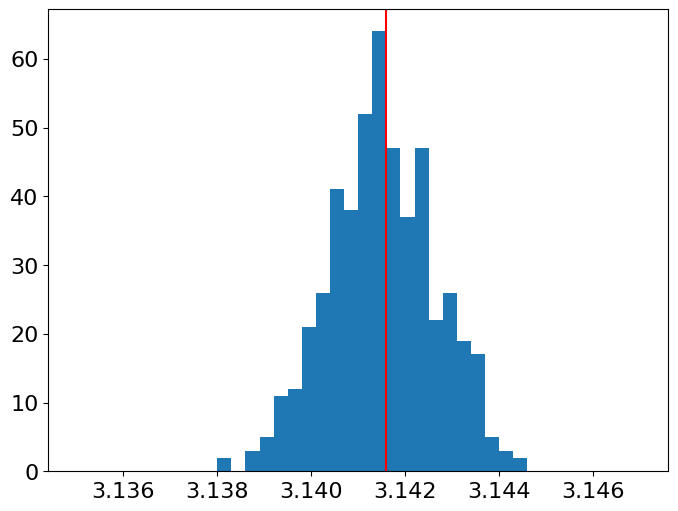

Standard deviation of results: 0.0011300409198897437


In [8]:
plt.hist(estimates, bins=40, range=(3.135,3.147))
plt.axvline(math.pi, 0, 1, color='r') # plot the true value of pi
plt.show()
print(f"Standard deviation of results: {estimates.std(ddof=1)}")

Second method (numerical integration):

In [9]:
N_tries = 50
N_attempts = 8_000_000
estimates = numpy.zeros(N_tries)
for this_try in tqdm.notebook.tqdm(range(N_tries)):
    x_values = numpy.random.uniform(0, 1, N_attempts)
    estimates[this_try] = numpy.sum(numpy.sqrt(1-x_values**2))/N_attempts*4

  0%|          | 0/50 [00:00<?, ?it/s]

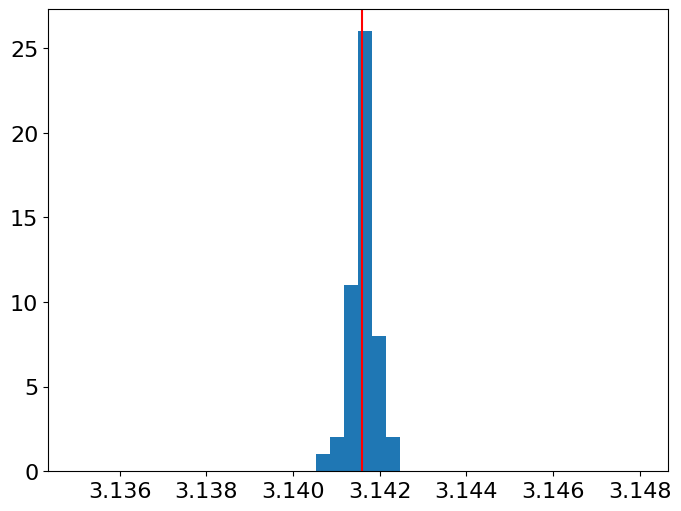

Standard deviation of results: 0.0002971427033630882


In [10]:
plt.hist(estimates, bins=40, range=(3.135,3.148))
plt.axvline(math.pi, 0, 1, color='r') # plot the true value of pi
plt.show()
print(f"Standard deviation of results: {estimates.std(ddof=1)}")

We see that for the same number of random numbers generated, we get better precision through the integration method.

### Generating random variables according to a distribution


We may want to generate random numbers $x_0, x_1, x_2, \ldots$ with probability proportional to a given function $f(x)$. So, for example, maybe we want to generate integers that would have the same distribution as the number of heads in 50 coin flips (a binomial distribution). Here's a method to generate such a sequence. We don't need a properly normalized PDF to use this; we just need a function proportional to the probability distribution.

### Accept/reject sampling
This (relatively simple) technique works like this in one dimension:
* your probability distribution $P(x)$ needs to be zero outside a finite range of $x$: say $x_\mathrm{min}$ to $x_\mathrm{max}$.  You also need to know a number $M$ such that $P(x) < M$ for the whole range.  ($M$ does not need to be the smallest such number.)
* in a loop, until you've generated enough numbers:
 * generate a random number $x_\mathrm{test}$ from a uniform distribution from $x_\mathrm{min}$ to $x_\mathrm{max}$: any random number generator can provide this.  (At worst it'll provide numbers in (0,1) and you'll have to scale them to the appropriate range.)
 * compute $y = P(x_\mathrm{test})/M$.
 * generate a random number $y_\mathrm{test}$ from a uniform distribution from 0 to 1.
 * if $y_\mathrm{test} < y$, you _accept_ $x_\mathrm{test}$ and add it to your sequence. If $y \ge y_\mathrm{test}$ you _reject_ $x_\mathrm{test}$.
 * go back to start of loop to try again.
 

In [11]:
# Implementation of accept/reject sampling for a continuous variable.
# Pass the Python function, the range of potential x values as a tuple (xmin, xmax), and the maximum value for f(x) to assume
# Object returned by function can return an infinite string of values of x
# this is a "generator" function: result can be used as an iterator
# this is indicated by the "yield" in place of "return"
def accept_reject(func, rng, maxval):
    from random import uniform
    while True:
        xtest = uniform(*rng)
        y = func(xtest)/maxval
        if y > 1:
            print(f"Problem: function ({y*maxval}) has exceeded maxval {maxval} for x {xtest}")
        ytest = uniform(0,1)
        if ytest < y:
            yield xtest
            
# Implementation of accept/reject sampling for an integer-valued variable.
# Like above, except that x will be generated for integers in the range (xmin, xmax), including the endpoints.
def accept_reject_integer(func, rng, maxval):
    from random import randint, uniform
    while True:
        xtest = randint(*rng)
        y = func(xtest)/maxval
        if y > 1:
            print(f"Problem: function ({y*maxval}) has exceeded maxval {maxval} for x {xtest}")
        ytest = uniform(0,1)
        if ytest < y:
            yield xtest

0it [00:00, ?it/s]

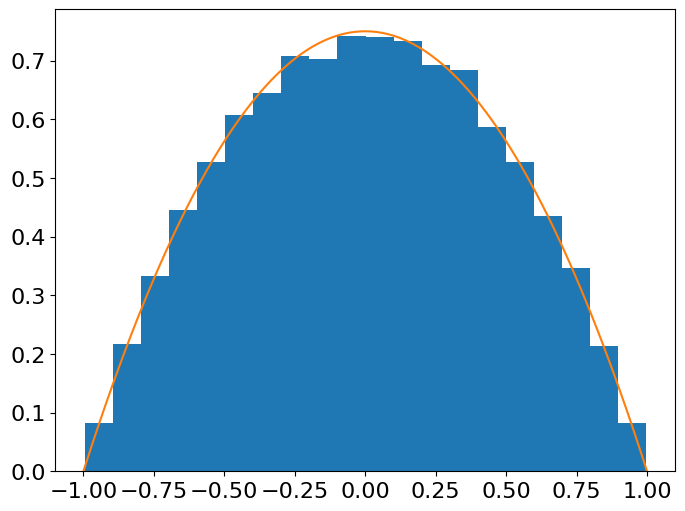

In [12]:
# example. some arbitrary PDF:
def quadratic(x):
    return 0.75*(1.-x*x) if -1 < x < 1 else 0

# some points:
from itertools import islice
generated_points = list(tqdm.notebook.tqdm(islice(accept_reject(quadratic, (-1,1), 1), 50000)))

# compare histogram of generated points to PDF
plt.hist(generated_points, bins=20, density=True)
plt.plot(numpy.linspace(-1,1,1000), numpy.frompyfunc(quadratic, 1, 1)(numpy.linspace(-1,1,1000)))
plt.show()

  0%|          | 0/50000 [00:00<?, ?it/s]

Some points: [20, 21, 31, 21, 26, 18, 25, 30, 22, 33]


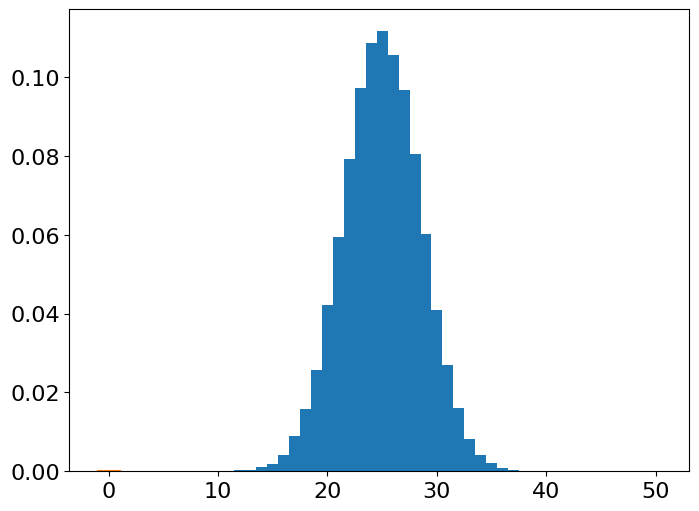

In [13]:
# return Stirling's approximation for log x! - gets better at high x, but even for x=1 it is correct to 0.081 
def stirling(x):
    # numpy.log is natural log
    # x should be an integer. replace 0 by 1, since log 0! = log 1!; maximum can be whatever
    xnew = numpy.clip(x, 1, None)
    return xnew*numpy.log(xnew)-xnew+0.5*numpy.log(2*math.pi*xnew)

# example. generate "number of coin flips" distribution without actually generating any coin flips.
def binomial_distribution(k, N, p):
    return numpy.exp(stirling(N) - stirling(k) - stirling(N-k) + k*numpy.log(p) + (N-k)*numpy.log(1-p))

def this_binomial_prob(k):
    return binomial_distribution(k, 50, 0.5)

# some points:
from itertools import islice
generated_points = list(tqdm.notebook.tqdm(islice(accept_reject_integer(this_binomial_prob, (0,50), 0.12), 50000), total=50000))

# print first 10:
print('Some points:', generated_points[:10])

# compare histogram of generated points to PDF
plt.hist(generated_points, range=(-0.5, 50.5), bins=51, density=True)
plt.plot(numpy.linspace(-1,1,1000), this_binomial_prob(numpy.linspace(-1,1,1000)))
plt.show()